In [17]:
import pandas as pd
import numpy as np
import musical
import matplotlib.pyplot as plt

In [5]:
# Load data
df1_path = "/Users/ampregnall/Documents/research/Metastatic-PPGL-Genomics/data/processed/mutational_signatures/input/output/SBS/mPPGL.SBS96.all"
df1 = pd.read_table(df1_path)
df1.drop(columns=df1.columns[[0]], axis=1,  inplace=True)
df1.head()

,PP002-DZ3A,PP002-DZ4A,PP002-DZ5A,PP008-DZ2A,PP009-DZ1B,PP009-DZ2B,PP010-DZ1A,PP010-DZ5A,PP010-F2,PP019-DZ1A,...,PP253-DZ1A,PP253-DZ2A,PP263-DZ2A,PP302-DZ1A,PP323-DZ3A,PP323-DZ4A,PP323-DZ5A,PP341-DZ2B,PP344-DZ1A,PP344-DZ3A
0,6,25,1,479,34,71,0,1,0,140,...,16,4,4,3,22,494,222,10,11,203
1,0,2,1,241,30,47,0,0,0,85,...,9,9,0,4,14,245,106,4,7,128
2,1,0,0,176,9,17,0,1,0,40,...,12,0,1,2,7,170,59,5,9,62
3,3,1,0,271,26,42,0,0,1,100,...,8,2,1,2,13,273,129,5,15,115
4,0,0,0,89,1,1,0,1,0,2,...,2,0,6,0,1,4,3,1,11,0


In [6]:
# Run MUSICAL on SNZ data
model = musical.DenovoSig(df1, min_n_components=1, max_n_components=8, 
                          init='random', method='mvnmf', n_replicates=20, 
                          ncpu=4, max_iter=100000, bootstrap=True, 
                          tol=1e-8, verbose=1, normalize_X=False)
model.fit()

Extracting signatures for n_components = 1..................
Selected lambda_tilde = 2. This lambda_tilde will be used for all subsequent mvNMF runs.


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/mvnmf.py:508: UserWarning: No p-value is smaller than or equal to 0.05. The largest lambda_tilde is selected. Enlarge the search grid of lambda_tilde.
  warnings.warn('No p-value is smaller than or equal to %.3g. The largest lambda_tilde is selected. Enlarge the search grid of lambda_tilde.' % self.pthresh,


Time elapsed: 155 seconds.
Extracting signatures for n_components = 2..................
Selected lambda_tilde = 0.1. This lambda_tilde will be used for all subsequent mvNMF runs.
Time elapsed: 1.26e+03 seconds.
Extracting signatures for n_components = 3..................
Selected lambda_tilde = 0.002. This lambda_tilde will be used for all subsequent mvNMF runs.
Time elapsed: 2.62e+03 seconds.
Extracting signatures for n_components = 4..................
Selected lambda_tilde = 0.002. This lambda_tilde will be used for all subsequent mvNMF runs.
Time elapsed: 3.81e+03 seconds.
Extracting signatures for n_components = 5..................
Selected lambda_tilde = 0.01. This lambda_tilde will be used for all subsequent mvNMF runs.
Time elapsed: 4.91e+03 seconds.
Extracting signatures for n_components = 6..................
Selected lambda_tilde = 0.002. This lambda_tilde will be used for all subsequent mvNMF runs.
Time elapsed: 6.26e+03 seconds.
Extracting signatures for n_components = 7....

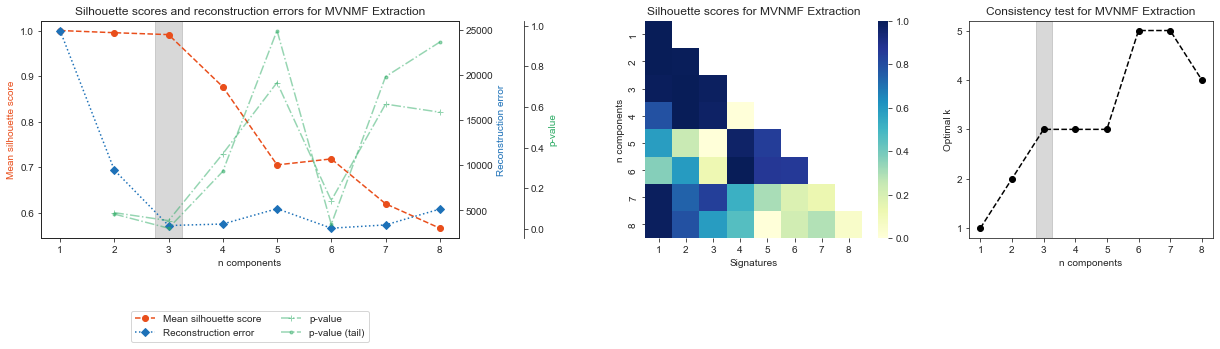

In [10]:
model.plot_selection(title="MVNMF Extraction", outfile = "/Users/ampregnall/Documents/research/Metastatic-PPGL-Genomics/data/processed/mutational_signatures/musical/mPPGL_mvnmf_extraction.pdf")

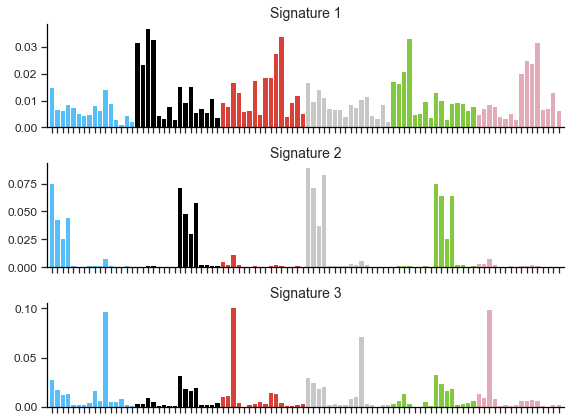

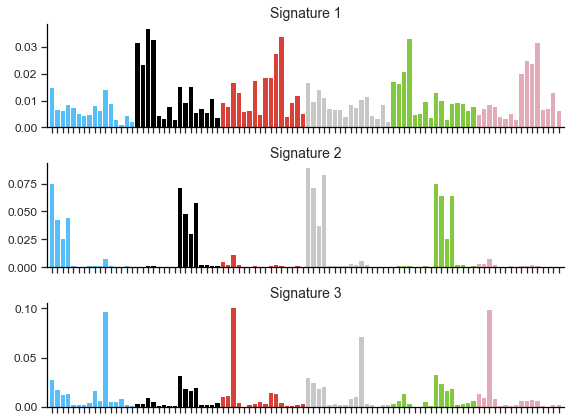

In [11]:
musical.sigplot_bar(model.W, outfile="/Users/ampregnall/Documents/research/Metastatic-PPGL-Genomics/data/processed/mutational_signatures/musical/mPPGL_mvnmf_signatures.pdf")

In [12]:
model.W_df.to_csv("/Users/ampregnall/Documents/research/Metastatic-PPGL-Genomics/data/processed/mutational_signatures/musical/mPPGL_signatures.txt", sep='\t')
model.H_df.to_csv("/Users/ampregnall/Documents/research/Metastatic-PPGL-Genomics/data/processed/mutational_signatures/musical/mPPGL_exposures.txt", sep='\t')

In [24]:
catalog = musical.load_catalog("/Users/ampregnall/Documents/research/Metastatic-PPGL-Genomics/metadata/COSMIC_v3p2_SBS_WGS.csv")
W_catalog = catalog.W
print(W_catalog.shape[1])

78


In [13]:
thresh_grid = np.array([
    0.0001, 0.0002, 0.0005,
    0.001, 0.002, 0.005,
    0.01, 0.02, 0.05,
    0.1, 0.2, 0.5,
    1., 2., 5.
])

In [26]:
model.assign_grid(W_catalog, 
                  method_assign='likelihood_bidirectional', # Method for performing matching and refitting
                  thresh_match_grid=thresh_grid, # Grid of threshold for matchinng
                  thresh_refit_grid=thresh_grid, # Grid of threshold for refitting
                  thresh_new_sig=0.0, # De novo signatures with reconstructed cosine similarity below this threshold will be considered novel
                  connected_sigs=False, # Whether or not to force connected signatures to co-occur
                  clean_W_s=True # An optional intermediate step to avoid overfitting to small backgrounds in de novo signatures for 96-channel SBS signatures
                 )

/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:1050: UserWarning: W_catalog has different feature names. The feature names of W_catalog will be converted to self.features. Make sure that the features match.
  warnings.warn('W_catalog has different feature names. The feature names of W_catalog will be converted to self.features. Make sure that the features match.',


In [28]:
model.validate_grid(validate_n_replicates=1, # Number of simulation replicates to perform for each grid point
                    grid_selection_method='pvalue', # Method for selecting the best grid point
                    grid_selection_pvalue_thresh=0.05 # Threshold used for selecting the best grid point
                   )

Extracting signatures for n_components = 3..................
Time elapsed: 162 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 229 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 110 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 239 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 297 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 132 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 249 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 227 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 604 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 276 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 517 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 398 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 814 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 706 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 688 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 416 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 319 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 341 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


Time elapsed: 2.02e+03 seconds.
Extracting signatures for n_components = 3..................


/Users/ampregnall/opt/anaconda3/lib/python3.8/site-packages/musical/denovo.py:358: UserWarning: Only 1 n_components value is tested. Selecting this n_components value.
  warnings.warn('Only 1 n_components value is tested. Selecting this n_components value.',


In [ ]:
print(model.best_grid_point)
print(model.thresh_match)
print(model.thresh_refit)

In [ ]:
W_s = model.W_s
H_s = model.H_s